In [1]:
conda install -c https://conda.anaconda.org/akode xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install speedml


Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
from pandas import DataFrame, read_csv
from speedml import Speedml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
playerdata = pd.read_csv("Contract Year data.csv", delimiter = ",")
playerdata = playerdata.iloc[: , 1:]
mldata = playerdata
yvar = playerdata['contract_year']
modelvariables = ['GP','L','MIN','DIST.†MILES†OFF','DIST.†MILES†DEF','AVG†SPEED','Rk','Salary Current','W','contract_year']
playerdata.describe

<bound method NDFrame.describe of                Player  Year Team  GP   W   L   MIN  DIST.†FEET  DIST.†MILES  \
0        Aaron Brooks  2017  IND  64  36  28  13.6      4953.5         0.94   
1        Aaron Gordon  2017  ORL  80  29  51  28.7     11234.2         2.13   
2        Aaron Gordon  2018  ORL  58  19  39  32.9     12792.0         2.42   
3        Aaron Gordon  2019  ORL  76  38  38  33.8     13509.5         2.56   
4        Aaron Gordon  2020  ORL  58  28  30  33.0     12995.1         2.46   
...               ...   ...  ...  ..  ..  ..   ...         ...          ...   
1710     Zhaire Smith  2019  PHI   6   2   4  18.4      7941.8         1.50   
1711     Zhaire Smith  2020  PHI   7   3   4   4.6      1945.7         0.37   
1712          Zhou Qi  2018  HOU  18  14   4   6.9      2525.6         0.48   
1713          Zhou Qi  2019  HOU   1   0   1   0.9       385.0         0.07   
1714  Zion Williamson  2020  NOP  18  10   8  29.4     12005.2         2.27   

      DIST.†MILES

In [4]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
playerdata

,Player,Year,Team,GP,W,L,MIN,DIST.†FEET,DIST.†MILES,DIST.†MILES†OFF,DIST.†MILES†DEF,AVG†SPEED,AVG†SPEED†OFF,AVG†SPEED†DEF,Rk,Salary Current,Salary Next,contract_year
0,Aaron Brooks,2017,IND,64,36,28,13.6,4953.5,0.94,0.51,0.43,4.14,4.35,3.92,274,$2700000,NaN,1
1,Aaron Gordon,2017,ORL,80,29,51,28.7,11234.2,2.13,1.14,0.99,4.45,4.85,4.06,210,$4351320,$5504420,0
2,Aaron Gordon,2018,ORL,58,19,39,32.9,12792.0,2.42,1.35,1.07,4.46,5.05,3.88,188,$5504420,NaN,1
3,Aaron Gordon,2019,ORL,76,38,38,33.8,13509.5,2.56,1.44,1.12,4.28,4.75,3.79,40,$21590909,$19863636,0
4,Aaron Gordon,2020,ORL,58,28,30,33.0,12995.1,2.46,1.36,1.10,4.20,4.65,3.76,53,$19863636,$18136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,Zhaire Smith,2019,PHI,6,2,4,18.4,7941.8,1.50,0.84,0.67,4.58,5.06,4.09,285,$2611800,$3058800,0
1711,Zhaire Smith,2020,PHI,7,3,4,4.6,1945.7,0.37,0.19,0.18,4.27,4.20,4.34,264,$3058800,$3204600,0
1712,Zhou Qi,2018,HOU,18,14,4,6.9,2525.6,0.48,0.26,0.22,4.10,4.20,3.99,455,$815615,$1378242,0
1713,Zhou Qi,2019,HOU,1,0,1,0.9,385.0,0.07,0.03,0.04,5.01,0.00,0.00,437,$1378242,$1618520,0


In [24]:
#sets playerdata to the modelvaraibles selected
playerdata = playerdata[modelvariables]

In [25]:
#If error appears here, run cell above again to work
#This strips the '$' from salary 
playerdata['Salary Current'] = playerdata['Salary Current'].apply(lambda x: x.strip('$'))

In [26]:
#sets salary current to numeric
playerdata["Salary Current"] = pd.to_numeric(playerdata["Salary Current"])

In [10]:
#Adds maxplayer option with less results and creates a new yvar 'max' for Training splits
maxplayer = playerdata[playerdata['Salary Current'] > 5000000]
maxplayer

,GP,L,MIN,DIST.†MILES†OFF,DIST.†MILES†DEF,AVG†SPEED,Rk,Salary Current,W,contract_year
2,58,39,32.9,1.35,1.07,4.46,188,5504420,19,1
3,76,38,33.8,1.44,1.12,4.28,40,21590909,38,0
4,58,30,33.0,1.36,1.10,4.20,53,19863636,28,0
13,68,22,32.3,1.12,1.02,3.99,7,26540100,46,0
14,69,25,31.5,1.13,0.99,4.03,11,27734405,44,0
...,...,...,...,...,...,...,...,...,...,...
1703,62,46,34.4,1.48,1.22,4.43,47,19500000,16,0
1704,60,40,34.8,1.45,1.24,4.34,54,19500000,20,0
1705,73,35,24.5,0.86,0.74,3.94,104,10361445,38,1
1706,59,41,25.6,0.90,0.78,3.96,95,12307692,18,0


In [11]:
yvarmax = maxplayer['contract_year']
maxplayer = maxplayer.drop(columns=['contract_year'])
yvarmax

2       1
3       0
4       0
13      0
14      0
       ..
1703    0
1704    0
1705    1
1706    0
1714    0
Name: contract_year, Length: 721, dtype: int64

In [33]:
#normalizes all data
columns = ('Rk','GP','W','MIN','L','AVG†SPEED','Salary Current')
for column in columns:
    playerdata[column] = playerdata[column] /playerdata[column].abs().max()
playerdata

#drops contract 'year from model variables to ensure no repition'
playerdata = playerdata.drop(columns=['contract_year'])
#splits contract year into XY and then divides using 80/20 splits
X = playerdata.values
Y = yvar.values
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size=0.2, 
                                                                                random_state=seed)


,GP,L,MIN,DIST.†MILES†OFF,DIST.†MILES†DEF,AVG†SPEED,Rk,Salary Current,W,contract_year
0,0.780488,0.444444,0.359788,0.51,0.43,0.748644,0.494585,0.067111,0.545455,1
1,0.975610,0.809524,0.759259,1.14,0.99,0.804702,0.379061,0.108156,0.439394,0
2,0.707317,0.619048,0.870370,1.35,1.07,0.806510,0.339350,0.136818,0.287879,1
3,0.926829,0.603175,0.894180,1.44,1.12,0.773960,0.072202,0.536663,0.575758,0
4,0.707317,0.476190,0.873016,1.36,1.10,0.759494,0.095668,0.493730,0.424242,0
...,...,...,...,...,...,...,...,...,...,...
1710,0.073171,0.063492,0.486772,0.84,0.67,0.828210,0.514440,0.064919,0.030303,0
1711,0.085366,0.063492,0.121693,0.19,0.18,0.772152,0.476534,0.076029,0.045455,0
1712,0.219512,0.063492,0.182540,0.26,0.22,0.741410,0.821300,0.020273,0.212121,0
1713,0.012195,0.015873,0.023810,0.03,0.04,0.905967,0.788809,0.034258,0.000000,0


In [27]:
from sklearn.model_selection import train_test_split
#imports another train test split for the purpose of Speedml
train, test = train_test_split(mldata, test_size=0.2)
train.to_csv('./Training Data.csv')
test.to_csv('./Testing Data.csv')

In [14]:
#exports and recreates these new csv with max for speedml
trainmax, testmax = train_test_split(maxplayer, test_size=0.2)
trainmax.to_csv('./Training Datamax.csv')
testmax.to_csv('./Testing Datamax.csv')

In [28]:
#sets sml as the predictor model and drops the automatically created "unnamed:0 column"
sml = Speedml('Training Data.csv', 'Testing Data.csv',target='contract_year')
sml.feature.drop(['Unnamed: 0'])

'Dropped 1 features with 18 features available.'

In [16]:
#uses the same but with 'max csv'
smlmax = Speedml('Training Datamax.csv', 'Testing Datamax.csv',target='contract_year')
smlmax.feature.drop(['Unnamed: 0'])

'Dropped 1 features with 9 features available.'

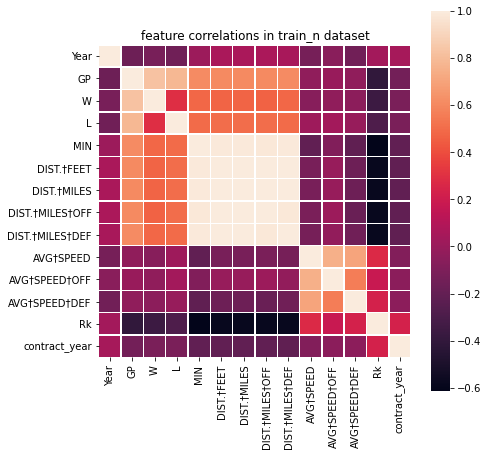

In [29]:
#heatmap
sml.plot.correlate()

<Figure size 432x288 with 0 Axes>

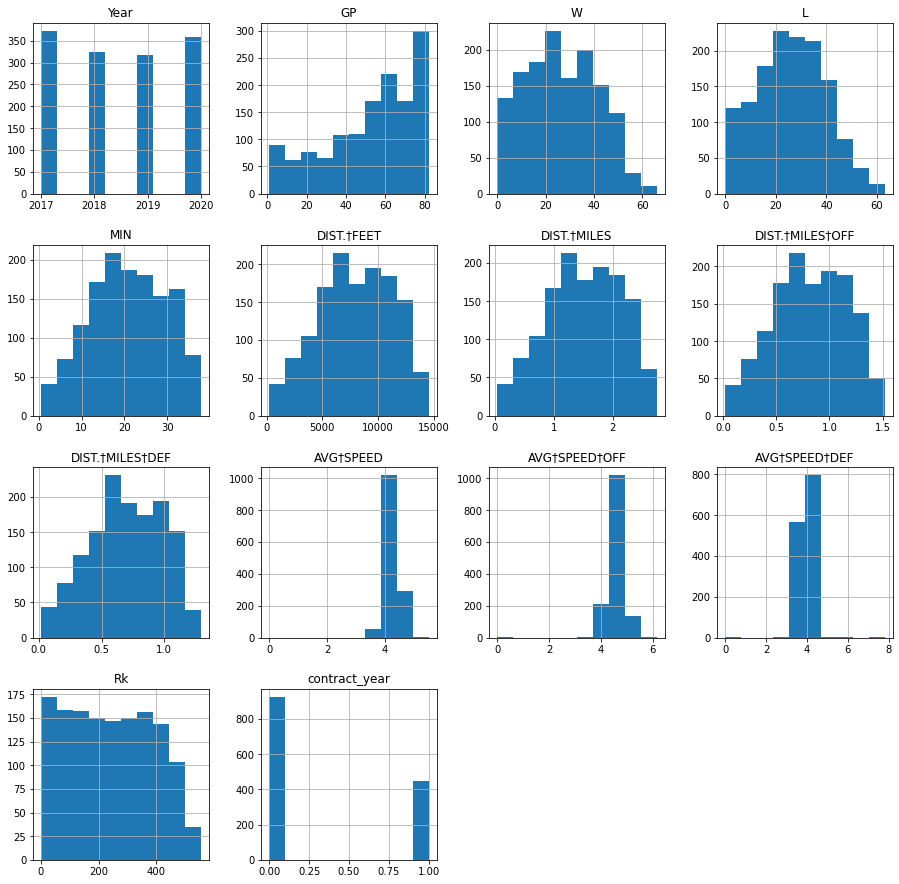

In [30]:
#shows plot distribution of data
sml.plot.distribute()

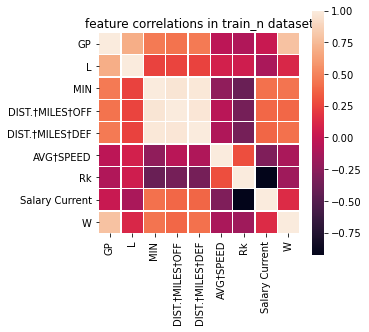

In [19]:
#shows only the 'max' or players with a salary above 5,000,000 to test for further results with heatmap
smlmax.plot.correlate()

'Imputed 449 empty values to 0.'

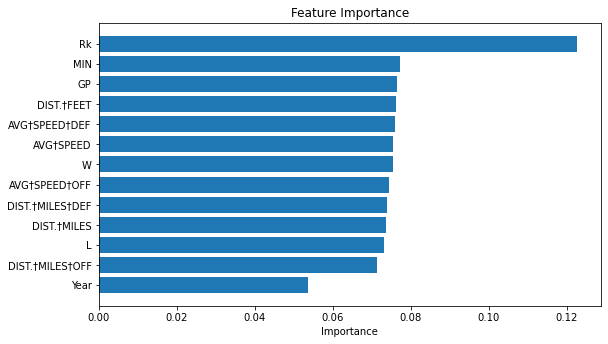

In [31]:
#shows feature importance
sml.feature.impute()
sml.plot.importance()

'Imputed 0 empty values to 0.'

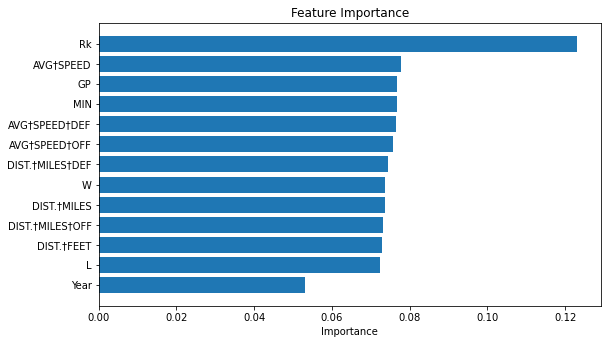

In [32]:
smlmax.feature.impute()
smlmax.plot.importance()

In [34]:
#runs series of models to see what models have greater fits, using 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#By using a more flexible approach, I was able to quickly run my data through several different algorithms
#My conclusion is in the cell below. 
results = []
names = []
for name, model in models:
    kfold= model_selection.KFold(n_splits=10)
    cv_results= model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='precision')
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(msg)
#LDA shows the highest, with SVM a very close second. 

LR: 0.511627 (0.104520)
LDA: 0.617072 (0.076384)
KNN: 0.532534 (0.089106)
CART: 0.434171 (0.065858)
NB: 0.447555 (0.047700)
SVM: 0.794762 (0.235553)


SVC(random_state=0)

SVC(random_state=0)

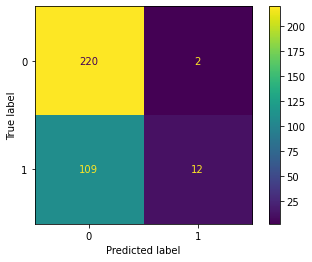

In [35]:
#uses svc one of the top best fit models to show the success of a confusion matrix in classifying the data
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
SVC(random_state=0)
predictions = clf.predict(X_validation)
cm = confusion_matrix(Y_validation, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()


LinearDiscriminantAnalysis()

SVC(random_state=0)

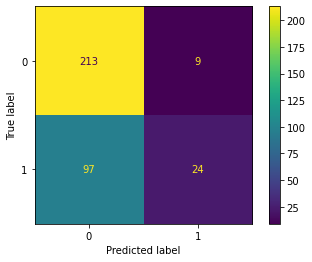

In [36]:
#uses LDS the top best fit models to show the success of a confusion matrix in classifying the data
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
SVC(random_state=0)
predictions = clf.predict(X_validation)
cm = confusion_matrix(Y_validation, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()